# Key West Food Project
## Intro
This project is based on an upcoming vacation I have to Keywest with my SO. This can be tied into a business application in that soem citys' tourist rates are in a decline and food is one of the main attractions for travel. This project will look at how we can leverage forsquare and zomatos' API's in order to figure out where the citys weaknesses and strengths are pertaining to their cuisine on the island of Key West.
## Data
The data is scraped from the zomato and forsquare API's zomato allows us to see restraunt ratings and prices for restraunts and merging both of these together will be important.
## Methodology
1. I retrieved the data from the above API's and we clean the data filtering out old venues and venues with 0.0 ratings and pairing the two API's together
2. I then plotted these locations on a map to see density of the venues and where they were most common.
3. Created bins and clustered the venues into two parts to show common characteristics.
## Results & Recommendations
Seafood, cuban restraunts, and hotels make up a majority of the venues on the island so they should market as a city twoards those venues. We find that places near waterfront tend to have better ratings as well as duval street so they could try to funnel more traffic to those places with other forms of entertainment.
## Conclusion
After doing analysis with zomato and foursquares API's I now know where to go eat on vacation and if I were part of the city council of Keywest I would try funneling traffic twoards locations that have better ratings to keep tourists coming back. This can be done through traditional business marketing techniques.

In [1]:
# Import needed packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
import requests
import folium

In [2]:
#Foursquare API
FOURSQUARE_CLIENT_ID = 'XIK5F0D3IJVUJGVHEXR43WLKFNHTWJQDUDLFCTP1TR4GR4KJ'
FOURSQUARE_CLIENT_SECRET = 'BYDPXC3YTMBDW20NYRRCED32D300MVIZEYHAPE5HNRQ4HXVI'
RADIUS = 3000
NO_OF_VENUES = 75
VERSION = '20200127'


In [3]:
#Set the coordinates for key west
KW_LATITUDE = '24.5551'
KW_LONGITUDE = '-81.7800'
print('The geograpical coordinates of Key West are {}, {}.'.format(KW_LATITUDE, KW_LONGITUDE))

#Map of Keywest 
keywest_map = folium.Map(location = [KW_LATITUDE, KW_LONGITUDE], zoom_start = 13)
folium.Marker([KW_LATITUDE, KW_LONGITUDE]).add_to(keywest_map)
keywest_map.save("Viz/KeyWest Map.html")
keywest_map

The geograpical coordinates of Key West are 24.5551, -81.7800.


In [4]:
# Define variables
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [5]:
#Fetching venues on the island
pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        KW_LATITUDE, 
                                                                        KW_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 75 venues fetched within a total radius of 3.0 Km

Total 75 venues fetched


In [6]:
# Fetching from zomato venues
headers = {'user-key': '70feb8cd38aa0e2f5b54c9e5398a1b76'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

In [7]:
#Marking Loations on map
keywest_map = folium.Map(location = [KW_LATITUDE, KW_LONGITUDE], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(keywest_map)  

keywest_map.save("Viz/Venues by Foursquare.html")
keywest_map

In [8]:
#Marking zomato on the map
keywest_map = folium.Map(location = [KW_LATITUDE, KW_LONGITUDE], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(keywest_map)  

keywest_map.save("Viz/Venues by Zomato.html")
keywest_map

In [9]:
#Merging the zomato and forsquare and selecting the venue list
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [10]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues


,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Dairy Queen,Ice Cream Shop,24.5537,-81.7888,Dairy Queen,24.5536,-81.7890,10.0,1.0,3.2,"1207 United St, Key West 33040",-0.0001,-0.0002
1,Kim's Kuban,Cuban Restaurant,24.5610,-81.7785,Kim's Kuban,24.5610,-81.7788,25.0,2.0,3.7,"2300 N Roosevelt Blvd, Key West 33040",0.0000,-0.0003
2,El Siboney Restaurant,Cuban Restaurant,24.5522,-81.7930,El Siboney Restaurant,24.5522,-81.7930,25.0,2.0,4.7,"900 Catherine St, Key West 33040",0.0000,0.0000
3,Sheraton Suites Key West,Hotel,24.5526,-81.7723,Coral Crab Cafe,24.5527,-81.7722,40.0,3.0,2.7,"2001 South Roosevelt Blvd, Key West 33040",0.0001,0.0001
4,Louie's Backyard,Seafood Restaurant,24.5473,-81.7927,Louie's Backyard,24.5475,-81.7930,70.0,4.0,4.0,"700 Waddell Ave, Key West 33040",0.0002,-0.0003
5,Seven Fish,Seafood Restaurant,24.5545,-81.7940,Seven Fish,24.5546,-81.7941,40.0,3.0,4.5,"921 Truman Avenue, Key West, 33040",0.0001,-0.0001
6,Coles Peace,Bakery,24.5620,-81.7960,Cole’s Peace Artisan Bakery and Deli,24.5619,-81.7961,10.0,1.0,3.4,"1111 Eaton St, Key West 33040",-0.0001,-0.0001
7,Ana's Cuban Cafe,Cuban Restaurant,24.5481,-81.7952,Ana's Cuban Cafe,24.5482,-81.7953,10.0,1.0,3.7,1330 Simonton Street 33040,0.0001,-0.0001
8,BottleCap & Blue Room Key West,Dive Bar,24.5500,-81.7967,Bottlecap Lounge & Liquor Store,24.5504,-81.7969,10.0,1.0,3.2,"1128 Simonton St, Key West 33040",0.0004,-0.0002
9,Island House Bar and Pool,Pool,24.5610,-81.7954,Island House,24.5607,-81.7957,25.0,2.0,3.4,"1129 Fleming St, Key West 33040",-0.0003,-0.0003


In [11]:
#Setting price for two
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])
selected_venues.head(5)

In [13]:
#Removing venues with 0.0
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 34


<BarContainer object of 24 artists>

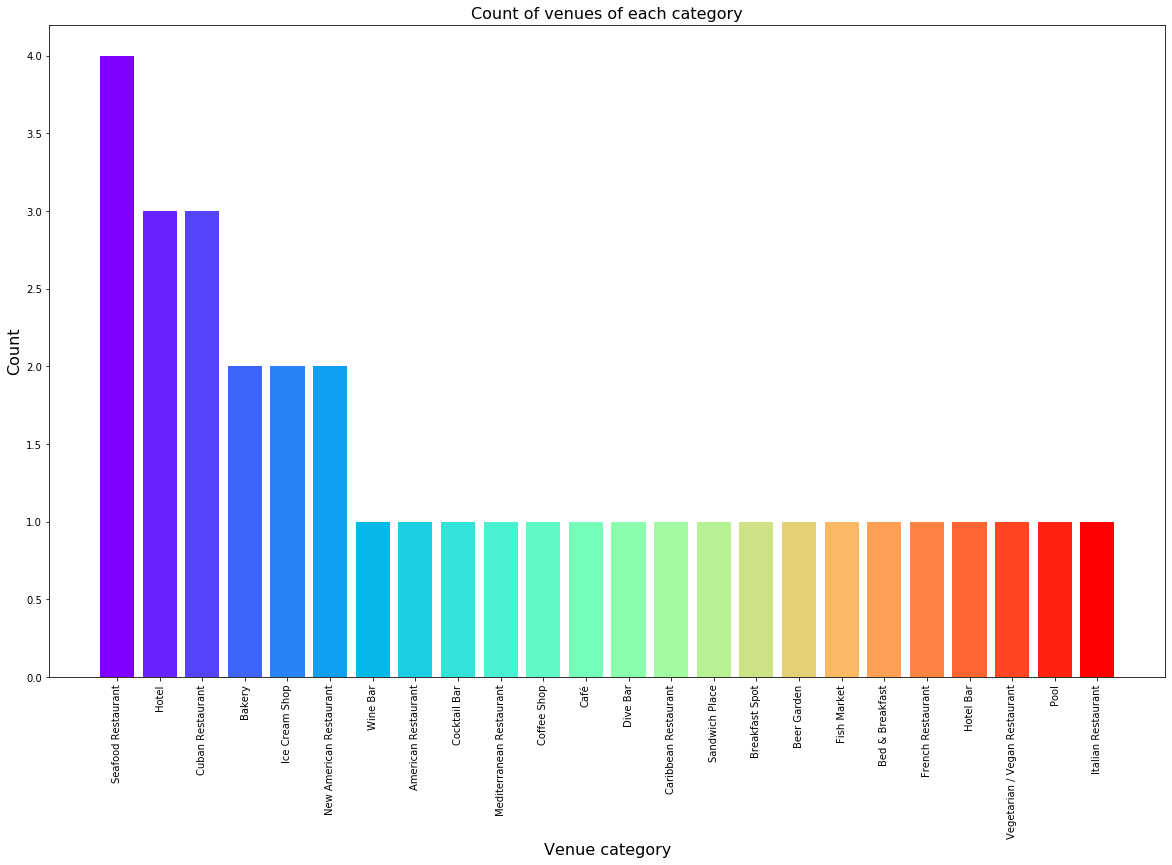

In [14]:
#Graphing the venues by category
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

In [16]:
#creation of bins for each venue
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

In [17]:
#Clustering the venues into two clusters to analyze
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Ice Cream Shop,Dairy Queen,24.5536,-81.7890,1.0,3.2,"1207 United St, Key West 33040",5.0,Good
1,0,Cuban Restaurant,Kim's Kuban,24.5610,-81.7788,2.0,3.7,"2300 N Roosevelt Blvd, Key West 33040",12.5,Good
2,0,Cuban Restaurant,El Siboney Restaurant,24.5522,-81.7930,2.0,4.7,"900 Catherine St, Key West 33040",12.5,Very good
3,1,Hotel,Coral Crab Cafe,24.5527,-81.7722,3.0,2.7,"2001 South Roosevelt Blvd, Key West 33040",20.0,Okay
4,1,Seafood Restaurant,Louie's Backyard,24.5475,-81.7930,4.0,4.0,"700 Waddell Ave, Key West 33040",35.0,Good


In [22]:
#Cluster 1 ratings
result = selected_venues[selected_venues['cluster_labels'] == 0]


print("Cluster 0's mean price: {:.02f} and rating of: {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

Cluster 0's mean price: 1.30 and rating of: 3.61


In [23]:
#Cluster 2 ratings
result = selected_venues[selected_venues['cluster_labels'] == 1]


print("Cluster 1's mean price: {:.02f} and rating of: {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

Cluster 1's mean price: 3.36 and rating of: 3.85
